In [1]:
import nltk
import numpy as np

from tqdm import tqdm
from models.merge import CNN, BiLSTM, ELMo
from data.Dataset import Dataset
from data.TrainSet import TrainSet
from keras.preprocessing.sequence import pad_sequences
from utils.utils import plot_words_cloud, plot_words_count, plot_compare_bars, plot_eval
tqdm.pandas(desc="progress-bar")
nltk.download('stopwords')
elmo = ELMo()

[nltk_data] Downloading package stopwords to
[nltk_data]     C:\Users\Chrysalis\AppData\Roaming\nltk_data...
[nltk_data]   Package stopwords is already up-to-date!
[nltk_data] Downloading package stopwords to
[nltk_data]     C:\Users\Chrysalis\AppData\Roaming\nltk_data...
[nltk_data]   Package stopwords is already up-to-date!
2021-11-11 00:39:59,130 : INFO : Loading model from ./212/...
2021-11-11 00:39:59,155 : INFO : We will cache the vocabulary of 100 tokens.
d:\study\semester 9\gan_env\lib\site-packages\keras\layers\legacy_rnn\rnn_cell_impl.py:901: UserWarning: `tf.nn.rnn_cell.LSTMCell` is deprecated and will be removed in a future version. This class is equivalent as `tf.keras.layers.LSTMCell`, and will be replaced by that in Tensorflow 2.0.
  warnings.warn("`tf.nn.rnn_cell.LSTMCell` is deprecated and will be "
d:\study\semester 9\gan_env\lib\site-packages\keras\engine\base_layer_v1.py:1684: UserWarning: `layer.add_variable` is deprecated and will be removed in a future version. P

Read books

In [2]:
name_A = "Nekrasov"
name_B = "Pushkin"

dataset = Dataset([name_A, name_B])
dataset.data

,label,author,text
0,0,Nekrasov,Николай Некрасов\nВ ДОРОГЕ\n«Скучно! скучно!....
1,1,Pushkin,Александр Пушкин\n19 ОКТЯБРЯ\nРоняет лес багр...


Clean text from punctuation

In [3]:
dataset.preprocess()
dataset.data


,label,author,text
0,0,Nekrasov,николай некрасов дорога скучно скучно ямщик уд...
1,1,Pushkin,александр пушкин октябрь ронять лес багряный с...


VISUALIZING THE DATA

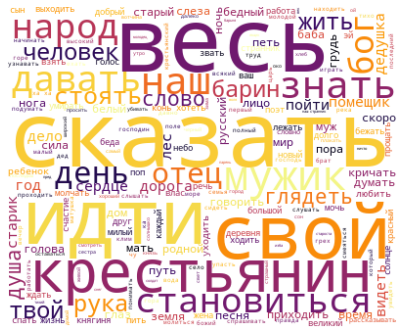

<Figure size 432x288 with 0 Axes>

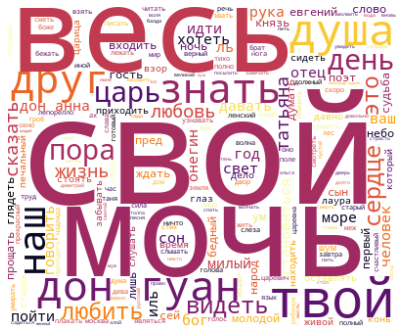

<Figure size 432x288 with 0 Axes>

In [4]:
plot_words_cloud(dataset.data)

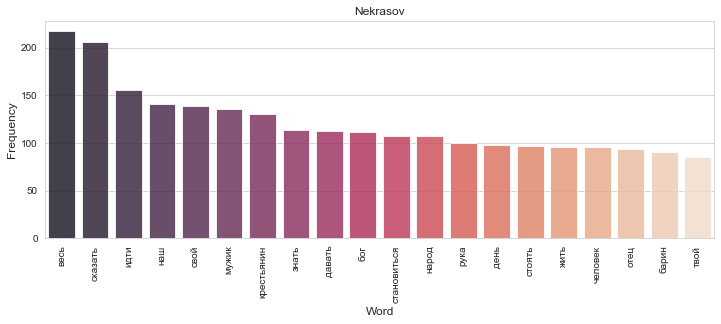

<Figure size 432x288 with 0 Axes>

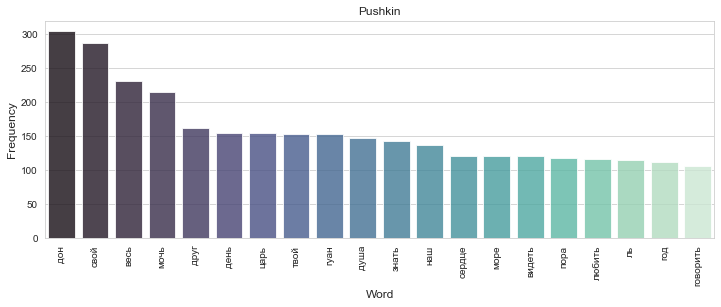

<Figure size 432x288 with 0 Axes>

In [5]:
plot_words_count(dataset.data)

Count and visualize as barplots

d:\study\semester 9\gan_env\lib\site-packages\seaborn\_decorators.py:36: FutureWarning: Pass the following variables as keyword args: x, y. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  warnings.warn(


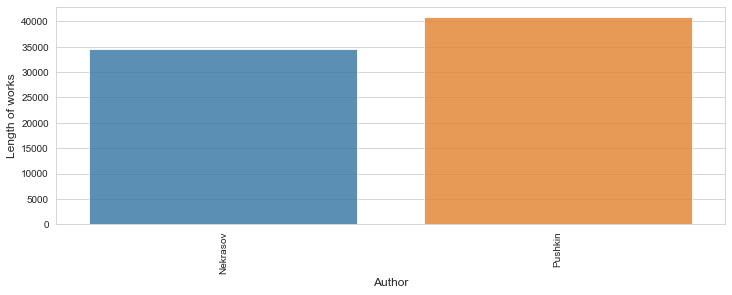

<Figure size 432x288 with 0 Axes>

In [6]:
plot_compare_bars(dataset.data)

In [7]:
dataset.chunking()
dataset.prep_data

,label,author,text
0,0,Nekrasov,"[николай, некрасов, дорога, скучно, скучно, ям..."
1,0,Nekrasov,"[варган, играть, читать, весь, дворянский, ман..."
2,0,Nekrasov,"[судить, нужный, сто, дворянство, холопка, вых..."
3,0,Nekrasov,"[напросто, тесно, вместе, жить, показываться, ..."
4,0,Nekrasov,"[корова, грех, сказать, ленивый, вишь, дело, р..."
...,...,...,...
1015,1,Pushkin,"[таилася, угасать, пламень, страстный, веселие..."
1016,1,Pushkin,"[бежать, толпа, обманчивый, мечтание, сожигать..."
1017,1,Pushkin,"[ох, анна, львовна, василье, львович, сестра, ..."
1018,1,Pushkin,"[подлец, попович, красовский, пропускать, алек..."


In [8]:
data_as_list = list(dataset.prep_data['text'])
embeddings = elmo.get_elmo_vectors(data_as_list)
embeddings.shape

2021-11-11 00:40:47,611 : INFO : Warming up ELMo on 40 sentences...
2021-11-11 00:40:51,014 : INFO : Warming up finished.
2021-11-11 00:40:51,021 : INFO : Texts in the current batch: 40
2021-11-11 00:40:51,137 : INFO : Texts in the current batch: 40
2021-11-11 00:40:51,257 : INFO : Texts in the current batch: 40
2021-11-11 00:40:51,375 : INFO : Texts in the current batch: 40
2021-11-11 00:40:51,493 : INFO : Texts in the current batch: 40
2021-11-11 00:40:51,613 : INFO : Texts in the current batch: 40
2021-11-11 00:40:51,732 : INFO : Texts in the current batch: 40
2021-11-11 00:40:51,849 : INFO : Texts in the current batch: 40
2021-11-11 00:40:51,968 : INFO : Texts in the current batch: 40
2021-11-11 00:40:52,088 : INFO : Texts in the current batch: 40
2021-11-11 00:40:52,208 : INFO : Texts in the current batch: 40
2021-11-11 00:40:52,324 : INFO : Texts in the current batch: 40
2021-11-11 00:40:52,443 : INFO : Texts in the current batch: 40
2021-11-11 00:40:52,563 : INFO : Texts in the 

(1884, 40, 1024)

In [9]:
dataset.set_embeddings(embeddings)
dataset.prep_data

,label,author,text,embedding
0,0,Nekrasov,"[николай, некрасов, дорога, скучно, скучно, ям...","[[0.1260775923728943, -0.23878134787082672, -0..."
1,0,Nekrasov,"[варган, играть, читать, весь, дворянский, ман...","[[-0.35026922821998596, 0.46835970878601074, 0..."
2,0,Nekrasov,"[судить, нужный, сто, дворянство, холопка, вых...","[[-0.29172366857528687, -0.5576289892196655, -..."
3,0,Nekrasov,"[напросто, тесно, вместе, жить, показываться, ...","[[-0.25846514105796814, 0.2403019368648529, 0...."
4,0,Nekrasov,"[корова, грех, сказать, ленивый, вишь, дело, р...","[[0.00383831188082695, -0.5180492401123047, 0...."
...,...,...,...,...
1015,1,Pushkin,"[таилася, угасать, пламень, страстный, веселие...","[[0.08737745881080627, -0.5055869817733765, -0..."
1016,1,Pushkin,"[бежать, толпа, обманчивый, мечтание, сожигать...","[[-0.05774588882923126, 0.009390659630298615, ..."
1017,1,Pushkin,"[ох, анна, львовна, василье, львович, сестра, ...","[[0.2089826762676239, -0.349669873714447, -0.4..."
1018,1,Pushkin,"[подлец, попович, красовский, пропускать, алек...","[[-0.3473629653453827, -1.1561721563339233, -0..."


In [10]:
train_set = TrainSet(dataset.prep_data)
train_set.shape

,Train,Test
X,"(1507, 40, 1024)","(377, 40, 1024)"
Y,"(1507,)","(377,)"


In [11]:
cnn = CNN(train_set.X_shape())
cnn.build()

Model: "CNN"
____________________________________________________________________________________________________________________________________________
Layer (type)                                  Output Shape                   Param #         Connected to                                   
input_1 (InputLayer)                          [(None, 40, 1024)]             0                                                              
____________________________________________________________________________________________________________________________________________
conv1d (Conv1D)                               (None, 38, 200)                614600          input_1[0][0]                                  
____________________________________________________________________________________________________________________________________________
conv1d_1 (Conv1D)                             (None, 37, 200)                819400          input_1[0][0]                                  


Train on 1507 samples
Epoch 1/10
1507/1507 - 4s - loss: 0.7637 - acc: 0.7001
Epoch 2/10
1507/1507 - 0s - loss: 0.3913 - acc: 0.8381
Epoch 3/10
1507/1507 - 0s - loss: 0.2941 - acc: 0.8898
Epoch 4/10
1507/1507 - 0s - loss: 0.1921 - acc: 0.9290
Epoch 5/10
1507/1507 - 0s - loss: 0.1220 - acc: 0.9589
Epoch 6/10
1507/1507 - 0s - loss: 0.0693 - acc: 0.9827
Epoch 7/10
1507/1507 - 0s - loss: 0.0459 - acc: 0.9867
Epoch 8/10
1507/1507 - 0s - loss: 0.0206 - acc: 0.9973
Epoch 9/10
1507/1507 - 0s - loss: 0.0314 - acc: 0.9914
Epoch 10/10
1507/1507 - 0s - loss: 0.0131 - acc: 0.9987


d:\study\semester 9\gan_env\lib\site-packages\keras\engine\training.py:2470: UserWarning: `Model.state_updates` will be removed in a future version. This property should not be used in TensorFlow 2.0, as `updates` are applied automatically.
  warnings.warn('`Model.state_updates` will be removed in a future version. '


Train: 1.000, Test: 0.9045


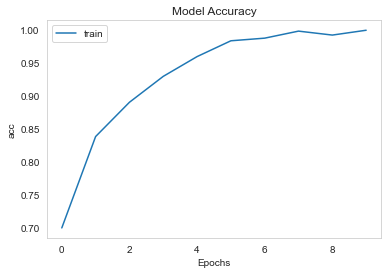

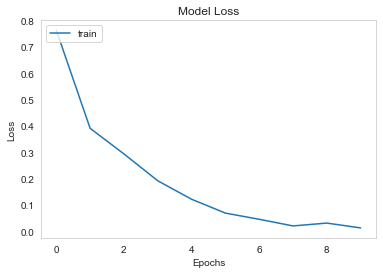

<Figure size 432x288 with 0 Axes>

In [12]:
cnn.fit(train_set)

In [13]:
cnn.predict(train_set)

array([1, 1, 1, 0, 0, 1, 0, 1, 0, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 0, 1, 1,
       1, 1, 0, 1, 0, 1, 0, 0, 1, 1, 0, 1, 0, 0, 1, 0, 0, 1, 0, 1, 1, 0,
       0, 0, 1, 1, 0, 1, 1, 1, 0, 1, 1, 1, 1, 0, 1, 0, 1, 1, 0, 1, 0, 1,
       0, 1, 1, 0, 0, 0, 0, 0, 1, 0, 1, 1, 1, 0, 1, 0, 1, 1, 1, 1, 0, 0,
       0, 0, 0, 1, 0, 0, 1, 1, 0, 0, 1, 0, 0, 1, 0, 0, 0, 1, 0, 1, 1, 1,
       1, 0, 0, 1, 0, 1, 0, 0, 1, 1, 0, 1, 1, 1, 1, 0, 0, 1, 1, 0, 1, 1,
       1, 1, 1, 1, 0, 1, 0, 0, 1, 0, 0, 1, 0, 0, 0, 0, 1, 1, 1, 1, 0, 0,
       1, 0, 1, 0, 1, 1, 1, 1, 1, 1, 0, 0, 1, 0, 1, 1, 1, 0, 0, 0, 1, 0,
       0, 0, 0, 1, 1, 1, 1, 0, 1, 1, 0, 0, 1, 0, 0, 0, 0, 1, 0, 1, 1, 0,
       0, 0, 0, 1, 1, 0, 1, 1, 0, 1, 1, 1, 0, 0, 1, 0, 0, 0, 1, 0, 0, 1,
       0, 0, 0, 1, 0, 1, 1, 1, 1, 0, 0, 1, 1, 0, 1, 1, 1, 1, 1, 1, 0, 0,
       0, 1, 1, 0, 1, 0, 1, 1, 0, 1, 0, 1, 0, 1, 0, 1, 1, 1, 1, 1, 0, 1,
       1, 1, 1, 0, 1, 0, 0, 0, 1, 1, 0, 0, 0, 1, 0, 1, 0, 0, 1, 1, 0, 1,
       0, 1, 1, 1, 1, 1, 1, 1, 0, 0, 1, 0, 1, 0, 0,

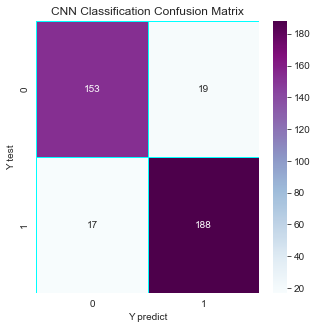

In [14]:
cnn.confusion_matrix(train_set)

In [15]:
cnn.validation(train_set)

score: 0.37
acc: 0.90


In [16]:
bilstm = BiLSTM(train_set.X_shape())
bilstm.build()

Model: "BiLSTM"
________________________________________________________________________________
Layer (type)                        Output Shape                    Param #     
input_2 (InputLayer)                [(None, 40, 1024)]              0           
________________________________________________________________________________
bidirectional (Bidirectional)       (None, 80)                      340800      
________________________________________________________________________________
dropout_1 (Dropout)                 (None, 80)                      0           
________________________________________________________________________________
dense_2 (Dense)                     (None, 30)                      2430        
________________________________________________________________________________
dropout_2 (Dropout)                 (None, 30)                      0           
________________________________________________________________________________
dense_3 (Den

Train on 1507 samples
Epoch 1/10
1507/1507 - 3s - loss: 0.6511 - acc: 0.6981
Epoch 2/10
1507/1507 - 2s - loss: 0.4055 - acc: 0.8447
Epoch 3/10
1507/1507 - 2s - loss: 0.3576 - acc: 0.8633
Epoch 4/10
1507/1507 - 2s - loss: 0.2603 - acc: 0.8998
Epoch 5/10
1507/1507 - 2s - loss: 0.2061 - acc: 0.9250
Epoch 6/10
1507/1507 - 2s - loss: 0.1427 - acc: 0.9482
Epoch 7/10
1507/1507 - 2s - loss: 0.1182 - acc: 0.9595
Epoch 8/10
1507/1507 - 2s - loss: 0.0672 - acc: 0.9801
Epoch 9/10
1507/1507 - 2s - loss: 0.0286 - acc: 0.9934
Epoch 10/10
1507/1507 - 2s - loss: 0.0119 - acc: 0.9987


d:\study\semester 9\gan_env\lib\site-packages\keras\engine\training.py:2470: UserWarning: `Model.state_updates` will be removed in a future version. This property should not be used in TensorFlow 2.0, as `updates` are applied automatically.
  warnings.warn('`Model.state_updates` will be removed in a future version. '


Train: 0.999, Test: 0.8912


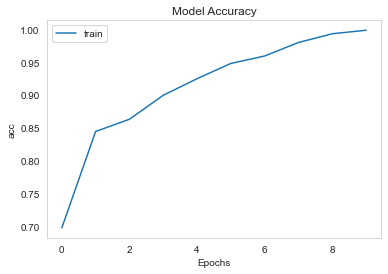

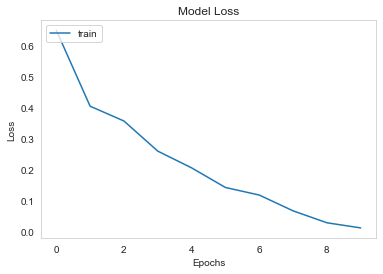

<Figure size 432x288 with 0 Axes>

In [17]:
bilstm.fit(train_set)

In [18]:
bilstm.predict(train_set)

array([1, 1, 1, 0, 0, 1, 0, 1, 0, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 0, 1, 1,
       1, 1, 0, 1, 0, 1, 0, 0, 1, 1, 0, 1, 0, 1, 1, 0, 0, 1, 0, 1, 1, 0,
       0, 1, 1, 1, 0, 1, 1, 1, 0, 1, 1, 1, 1, 0, 1, 0, 1, 1, 0, 1, 0, 1,
       0, 1, 1, 0, 0, 0, 0, 0, 1, 0, 1, 1, 0, 0, 1, 0, 1, 1, 1, 1, 1, 0,
       0, 0, 0, 1, 0, 0, 1, 1, 0, 0, 1, 0, 0, 1, 0, 0, 0, 1, 0, 1, 1, 1,
       1, 0, 0, 1, 1, 1, 1, 0, 1, 0, 0, 1, 1, 1, 1, 0, 0, 1, 1, 0, 1, 1,
       1, 1, 1, 1, 0, 1, 0, 1, 1, 0, 0, 1, 0, 0, 0, 0, 1, 1, 1, 1, 0, 0,
       1, 0, 1, 0, 1, 1, 1, 1, 1, 1, 0, 0, 1, 0, 1, 1, 1, 0, 0, 0, 1, 0,
       0, 0, 0, 1, 0, 1, 1, 0, 1, 1, 0, 1, 1, 0, 0, 0, 0, 1, 0, 1, 1, 0,
       0, 0, 0, 1, 1, 1, 1, 1, 0, 1, 1, 1, 0, 0, 1, 0, 0, 0, 1, 0, 0, 1,
       0, 0, 0, 1, 0, 1, 1, 1, 1, 0, 0, 1, 1, 0, 1, 0, 1, 1, 1, 1, 0, 0,
       0, 1, 1, 0, 1, 1, 1, 1, 0, 1, 0, 1, 0, 1, 0, 1, 1, 1, 1, 0, 0, 1,
       1, 1, 1, 0, 1, 0, 0, 0, 1, 1, 0, 0, 0, 1, 0, 1, 0, 0, 1, 1, 0, 1,
       0, 1, 1, 1, 1, 1, 1, 1, 0, 0, 1, 0, 1, 0, 0,

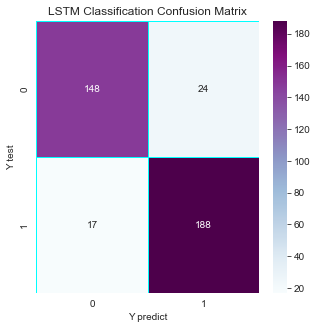

In [19]:
bilstm.confusion_matrix(train_set)

In [20]:
bilstm.validation(train_set)

score: 0.45
acc: 0.89


# Validation

**Save Model**

In [21]:
model.save('Mymodel.h5')

NameError: name 'model' is not defined

**Test with new and different data set aside from the data to build the model.**

note : sentiment  = {'positive': 0,'neutral': 1,'negative':2} 

In [ ]:
message = ['Congratulations! you have won a $1,000 Walmart gift card']
seq = tokenizer.texts_to_sequences(message)

padded = pad_sequences(seq, maxlen=X.shape[1], dtype='int32', value=0)

pred = model.predict(padded)

labels = ['0', '1', '2']
print(pred, labels[np.argmax(pred)])

In [ ]:
message = ['such massive asteroid hit will certainly create new business opportunities']
seq = tokenizer.texts_to_sequences(message)

padded = pad_sequences(seq, maxlen=X.shape[1], dtype='int32', value=0)

pred = model.predict(padded)

labels = ['0', '1', '2']
print(pred, labels[np.argmax(pred)])

In [ ]:
message = ['so does anyone else not open Snapchat anymore ? or is it just me ... ugh this so sad.']
seq = tokenizer.texts_to_sequences(message)

padded = pad_sequences(seq, maxlen=X.shape[1], dtype='int32', value=0)

pred = model.predict(padded)

labels = ['0', '1', '2']
print(pred, labels[np.argmax(pred)])

In [ ]:
message = [
    '@elonmusk had a terrible experience with a very pushy sales guy from tesla Stanford shop while shopping for model x']
seq = tokenizer.texts_to_sequences(message)

padded = pad_sequences(seq, maxlen=X.shape[1], dtype='int32', value=0)

pred = model.predict(padded)

labels = ['0', '1', '2']
print(pred, labels[np.argmax(pred)])

In [ ]:
message = [
    'The local electronics industry is expected to remain stable amid layoff concerns surrounding Japanese electronics giants operating in the country, an official says.']
seq = tokenizer.texts_to_sequences(message)

padded = pad_sequences(seq, maxlen=X.shape[1], dtype='int32', value=0)

pred = model.predict(padded)

labels = ['0', '1', '2']
print(pred, labels[np.argmax(pred)])

In [ ]:
message = ['The local electronics industry is amid layoff concerns and last year has laid off tens of employees']
seq = tokenizer.texts_to_sequences(message)

padded = pad_sequences(seq, maxlen=X.shape[1], dtype='int32', value=0)

pred = model.predict(padded)

labels = ['0', '1', '2']
print(pred, labels[np.argmax(pred)])